In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRegressor
# pd.options.display.max_columns = 999

## Import Data

In [0]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [0]:
train['source']='train'
test['source']='test'
data = pd.concat([train,test],sort=False)

In [0]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [0]:
# train.info()
# train.Product_Category_2=train.Product_Category_2.astype('int32', copy=False)
# train.Product_Category_3.apply(pd.to_numeric)
# train.Product_Category_2.apply(fillna=0)
train.info()

# comment on null data ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
source                        550068 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 54.6+ MB


## Explore Data

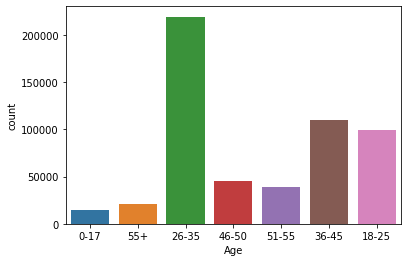

In [0]:
sns.countplot(train.Age)

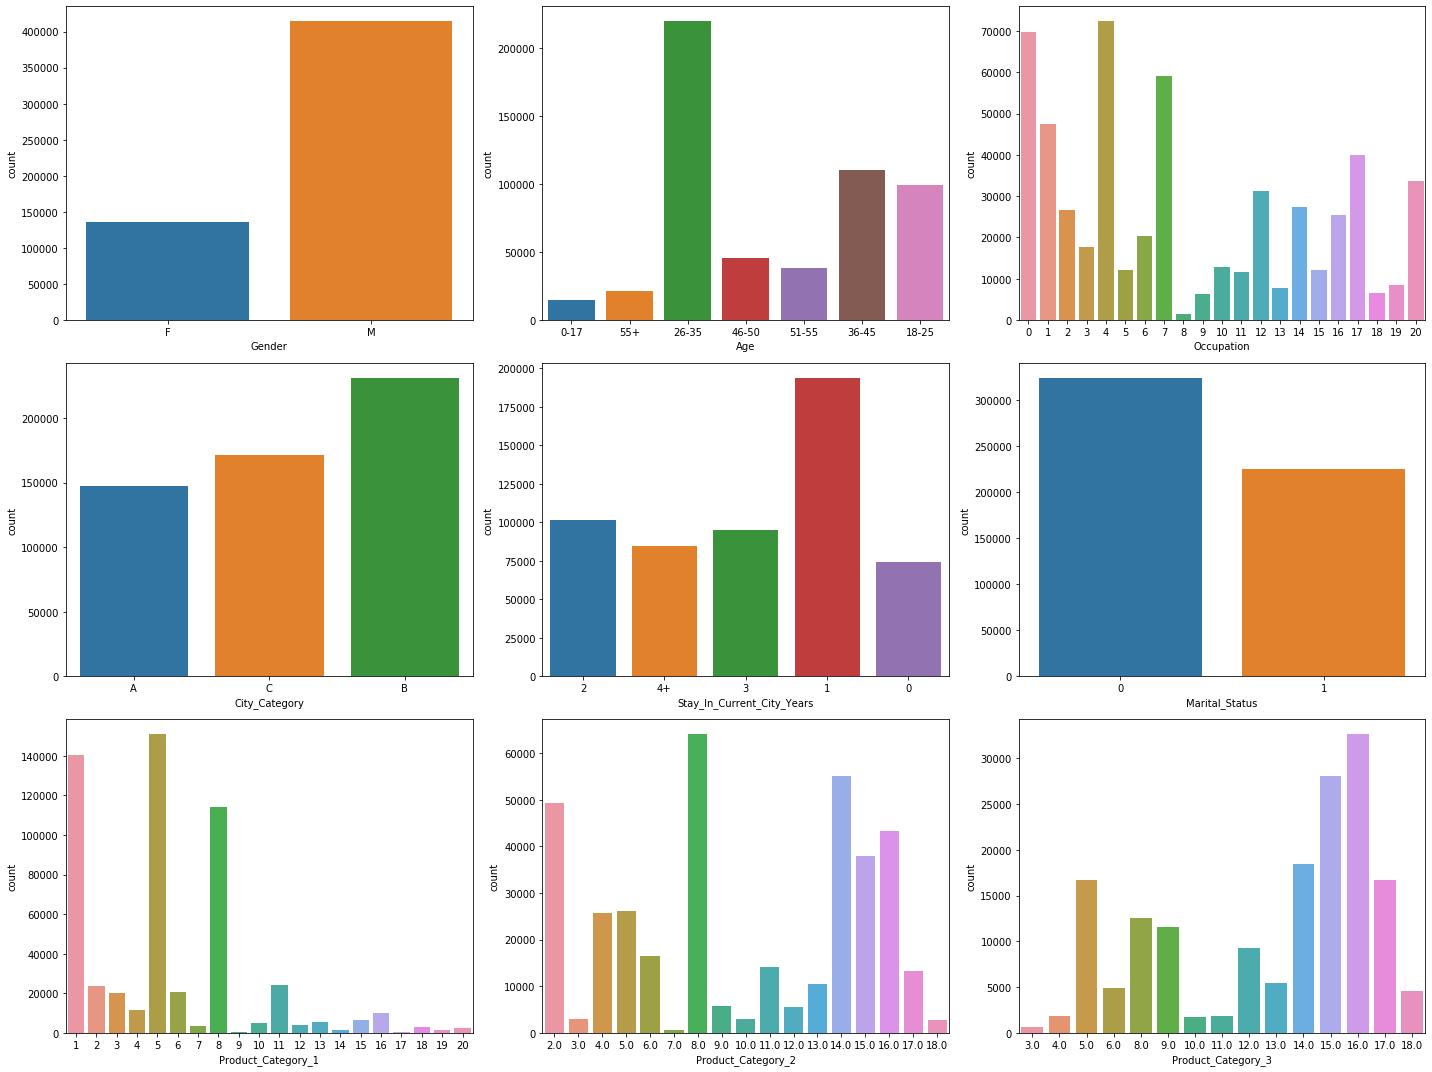

In [0]:
# train.hist(bins=50, figsize=(20,15))
f, axes = plt.subplots(3, 3, figsize = (20, 15))
sns.countplot(train.Gender, ax=axes[0][0])
sns.countplot(train.Age, ax=axes[0][1])
sns.countplot(train.Occupation, ax=axes[0][2])
sns.countplot(train.City_Category, ax=axes[1][0])
sns.countplot(train.Stay_In_Current_City_Years, ax=axes[1][1])
sns.countplot(train.Marital_Status, ax=axes[1][2])
sns.countplot(train.Product_Category_1, ax=axes[2][0])
sns.countplot(train.Product_Category_2, ax=axes[2][1])
sns.countplot(train.Product_Category_3, ax=axes[2][2])
f.tight_layout()
f.savefig('count.png',bbox_inches='tight')
# fig.delaxes(axes[1][2])

### heat map to check correlation between attributes

In [0]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


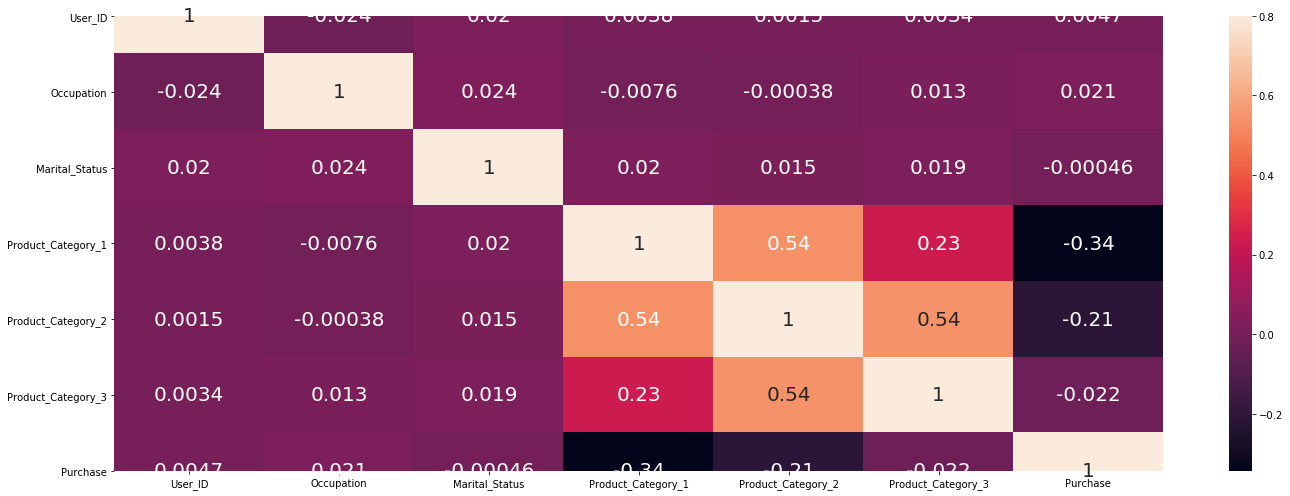

In [0]:
f2, ax2 = plt.subplots(figsize=(20, 7))
sns.heatmap(corr, vmax=0.8,annot_kws={'size': 20}, annot=True)
plt.savefig('heatmap.png',bbox_inches='tight')


### according to the heat map:
##### - product category 1 correlates to product category 2 but not logical to analyse 
##### - product category 1 correlates to product category 3 but not logical to analyse
##### - product category 2 correlates to product category 3 but not logical to analyse
##### - product category 1 negatively correlates to Purchase -> logical to analyze
##### - product category 2 negatively correlates to Purchase -> logical to analyze

In [0]:
def plotPivot(x_feature,y_feature,sub,funct):
    table = train.pivot_table(index=x_feature, values=y_feature, aggfunc=funct) 
    table.plot(kind='bar', color='blue',ax=sub)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
#     plt.title(x_feature+" and "+y_feature)
    plt.xticks(rotation=0)
#     return p

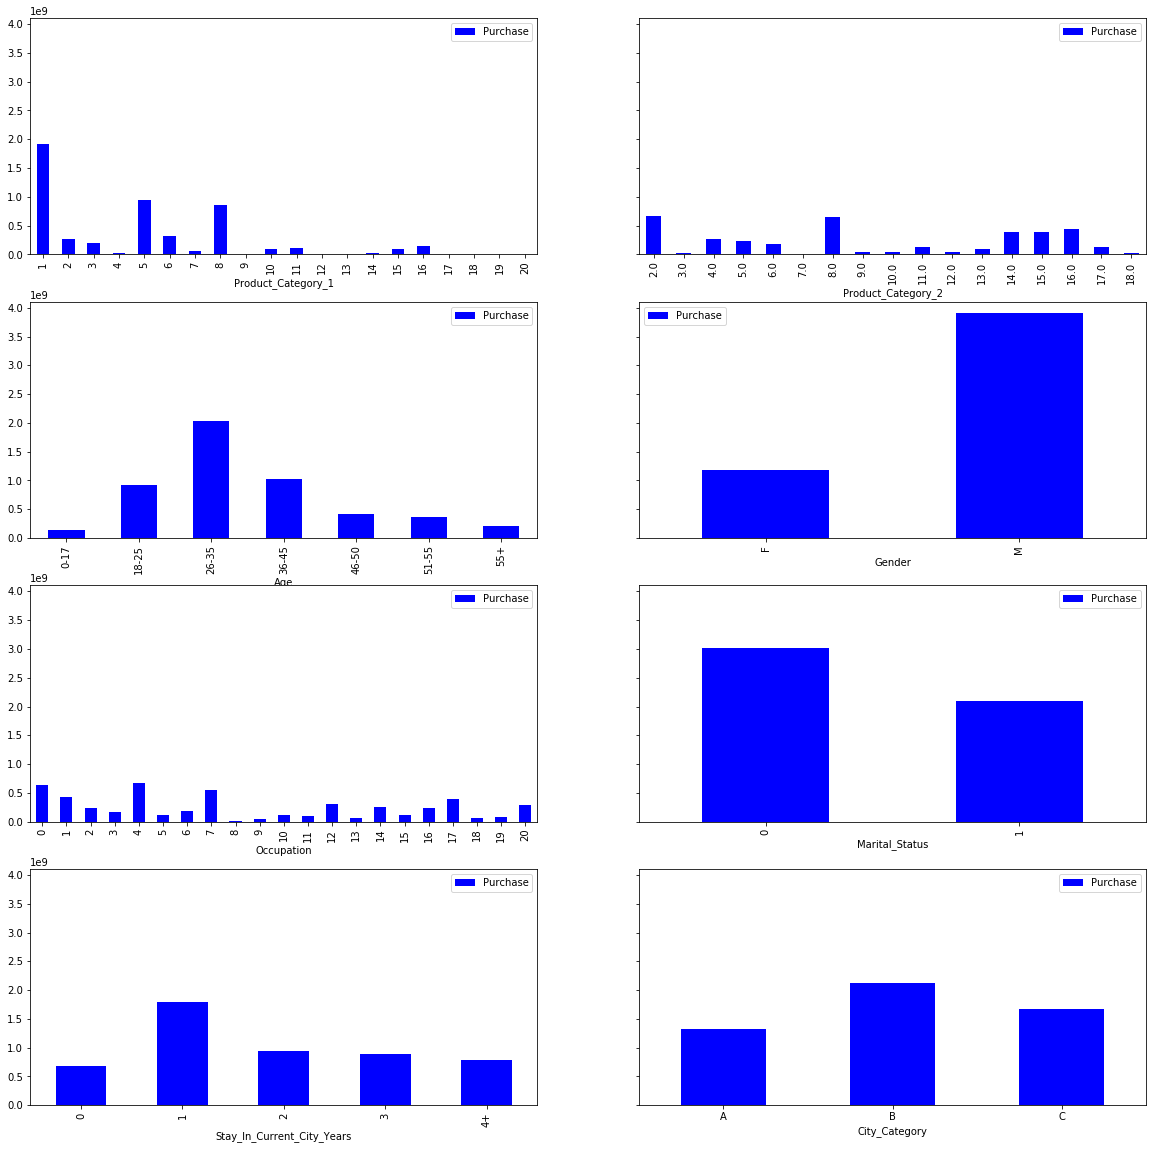

In [0]:
# plt.plot(train.Product_Category_1,train.Purchase) -> can't be used because Product_Category_1 has duplicate values
f3, axes3 = plt.subplots(4, 2, sharey=True, figsize = (20, 20))
plotPivot('Product_Category_1','Purchase',axes3[0][0],np.sum)
plotPivot('Product_Category_2','Purchase',axes3[0][1],np.sum)
plotPivot('Age','Purchase',axes3[1][0],np.sum)
plotPivot('Gender','Purchase',axes3[1][1],np.sum)
plotPivot('Occupation','Purchase',axes3[2][0],np.sum)
plotPivot('Marital_Status','Purchase',axes3[2][1],np.sum)
plotPivot('Stay_In_Current_City_Years','Purchase',axes3[3][0],np.sum)
plotPivot('City_Category','Purchase',axes3[3][1],np.sum)
# f3.delaxes(axes3[3][1])
# cat1_purchase = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum) 
# cat1_purchase.plot(kind='bar', color='blue',ax=axes3[0])
# plt.xlabel("Product_Category_1")
# plt.ylabel("Purchase")
# plt.title("Product_Category_1 and Purchase Analysis")
# plt.xticks(rotation=0)

# cat2_purchase.plot(kind='bar', color='blue',ax=axes3[1])
# plt.xlabel("cat2_purchase")
# plt.ylabel("Purchase")
# plt.title("cat2_purchase and Purchase Analysis")
# plt.xticks(rotation=0)
plt.savefig('relation with purchase - sum.png',bbox_inches='tight')


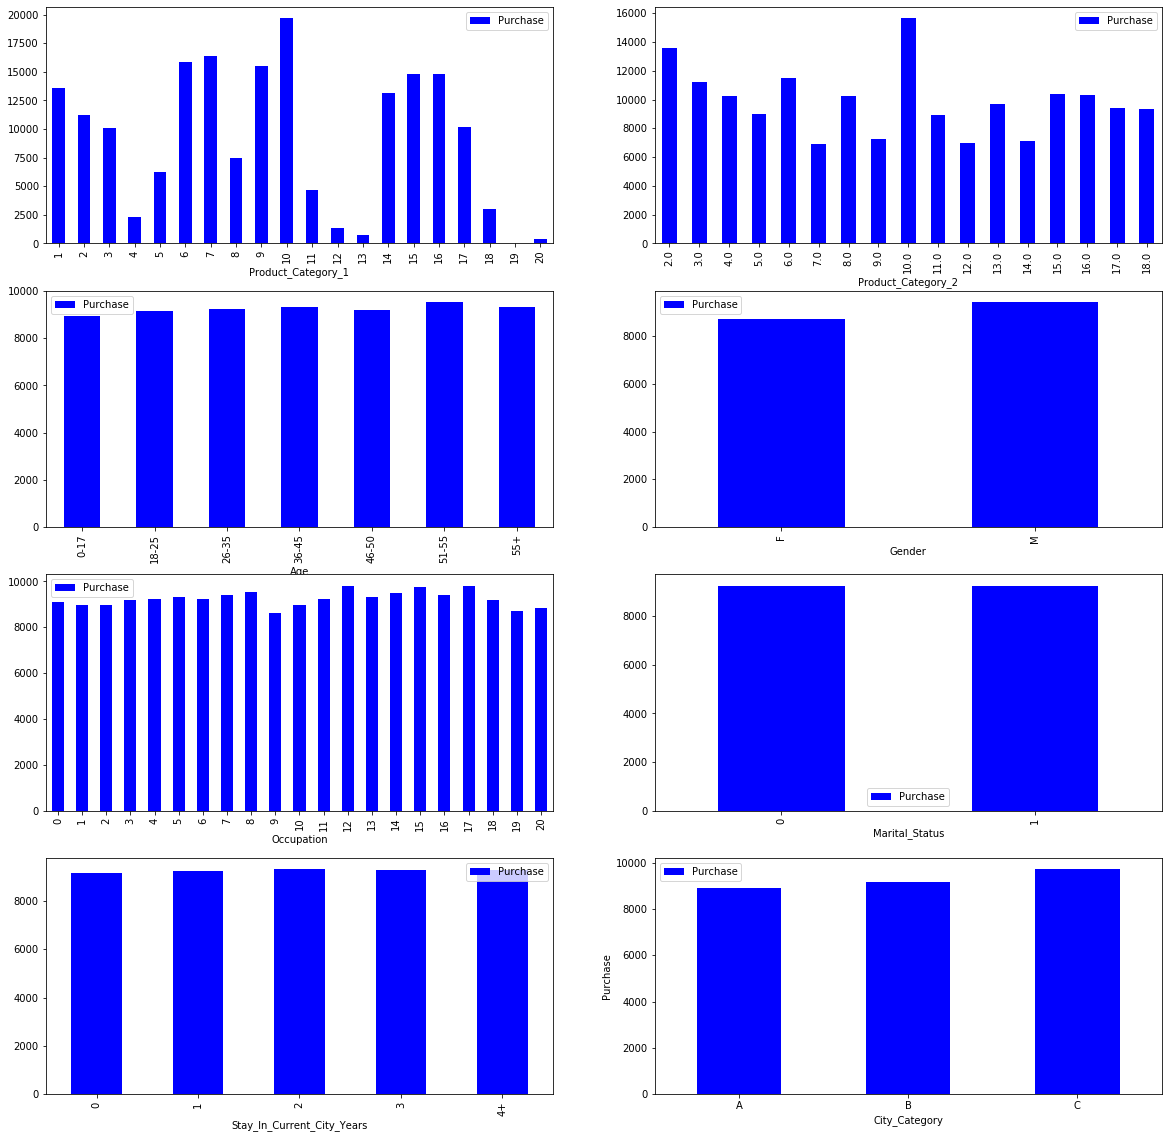

In [0]:
f4, axes4 = plt.subplots(4, 2, figsize = (20, 20))
plotPivot('Product_Category_1','Purchase',axes4[0][0],np.mean)
plotPivot('Product_Category_2','Purchase',axes4[0][1],np.mean)
plotPivot('Age','Purchase',axes4[1][0],np.mean)
plotPivot('Gender','Purchase',axes4[1][1],np.mean)
plotPivot('Occupation','Purchase',axes4[2][0],np.mean)
plotPivot('Marital_Status','Purchase',axes4[2][1],np.mean)
plotPivot('Stay_In_Current_City_Years','Purchase',axes4[3][0],np.mean)
plotPivot('City_Category','Purchase',axes4[3][1],np.mean)
# f4.delaxes(axes4[3][1])
plt.savefig('relation with purchase - mean.png',bbox_inches='tight')


## Data Pre-Processing

### Fill Missing Data

In [0]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [0]:
data["Product_Category_2"]=data["Product_Category_2"].fillna(0.0).astype("float")  # check if we can use mean instead of 0.0
data["Product_Category_3"]=data["Product_Category_3"].fillna(0.0).astype("float")
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
dtype: int64

#### Converting Categorical Data to Numerical

In [0]:
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
source                            2
dtype: int64

In [0]:
#Convert gender binary
gender_dict = {'F':0, 'M':1}
data['Gender'] = data['Gender'].apply(lambda x: gender_dict[x])
data['Gender'].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

In [0]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data['Age'] = data['Age'].apply(lambda x: age_dict[x])
data['Age'].value_counts()

2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: Age, dtype: int64

In [0]:
# deal with '+' in Stay_In_Current_City_Years
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(lambda x: 10 if '+' in x else x)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype("int64")
data['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
10    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

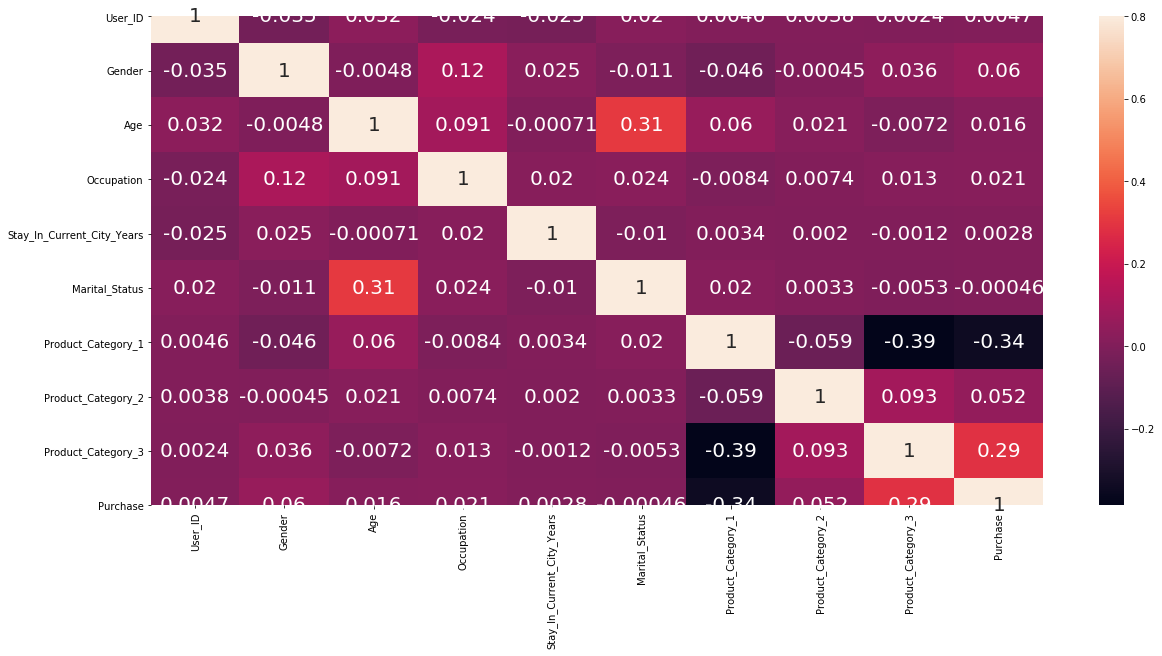

In [0]:
numeric_features_data= data.select_dtypes(include=[np.number])
corr_data = numeric_features_data.corr()
f2, ax2 = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_data, vmax=.8,annot_kws={'size': 20}, annot=True)
# corr_data

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null int64
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
source                        783667 non-null object
dtypes: float64(3), int64(7), object(3)
memory usage: 83.7+ MB


In [0]:
# Giving Age Numerical values
age_dict = {'A':0, 'B':1, 'C':2}
data['City_Category'] = data['City_Category'].apply(lambda x: age_dict[x])
data['City_Category'].value_counts()

1    329739
2    243684
0    210244
Name: City_Category, dtype: int64

In [0]:
def countVar(df):
    count_dict = {}
    for index, row in df.iterrows():
        if row['Product_ID'] in count_dict:
            count_dict[row['Product_ID']]+=1
        else:
            count_dict[row['Product_ID']]=1
    df['Product_ID_Count'] = df['Product_ID'].apply(lambda x: count_dict[x])

In [0]:
#Storing and loading the data after processing it
processed_train = data.loc[data['source']=="train"]
processed_test = data.loc[data['source']=="test"]

processed_train.drop(['source'],axis=1,inplace=True)
processed_test.drop(['source'],axis=1,inplace=True)

# processed_train.to_csv("data/processed_train.csv",index=False)
# processed_test.to_csv("data/processed_test.csv",index=False)

c:\programdata\miniconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
processed_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370.0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422.0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057.0
4,1000002,P00285442,1,6,16,2,10,0,8,0.0,0.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,1,1,1,20,0.0,0.0,368.0
550064,1006035,P00375436,0,2,1,2,3,0,20,0.0,0.0,371.0
550065,1006036,P00375436,0,2,15,1,10,1,20,0.0,0.0,137.0
550066,1006038,P00375436,0,6,1,2,2,0,20,0.0,0.0,365.0


In [0]:
processed_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(8), object(1)
memory usage: 54.6+ MB


In [0]:
# pandas drop a column with drop function
processed_train.drop(['Product_ID'], axis=1,inplace=True)


In [0]:
processed_test.drop(['Product_ID'], axis=1,inplace=True)
processed_test.drop(['User_ID'], axis=1,inplace=True)
processed_test.drop(['Purchase'], axis=1,inplace=True)

In [0]:
processed_train.drop(['User_ID'], axis=1,inplace=True)

In [0]:
processed_train.to_csv("data/processed_train.csv",index=False)
processed_test.to_csv("data/processed_test.csv",index=False)

### Feature Engineering

In [0]:
'''linear regression :('''
def Linear_prediction(X):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    lin_model = LinearRegression().fit(X_train, y_train)    
    var = lin_model.score(X_test, y_test)
    return var

In [0]:
'''Decision Tree'''
#best is 5 features with PCA
def DTPrediction(X,i):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
    DT.fit(X_train,y_train)
    var = DT.score(X_test, y_test)
    return [var,i]

In [0]:
'''Random Forests'''
#best is 5 features with PCA
def DTPrediction(X,i):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
    DT.fit(X_train,y_train)
    var = DT.score(X_test, y_test)
    return [var,i]

In [0]:
 from sklearn.preprocessing import StandardScaler


In [0]:
# def modelFit(model,X):
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#     scaler = StandardScaler()
#     scaler.fit(X_train)
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
#     model.fit(X_train,y_train)
#     var = model.score(X_test, y_test)
#     return var

In [0]:
def modelFit(model,X):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    model.fit(X_train,y_train)
    training_accuracy=model.score(X_train, y_train)
    testing_accuracy = model.score(X_test, y_test)
    return [training_accuracy,testing_accuracy]

In [0]:
'''choosing which number of components is the best -> PCA'''
y = processed_train['Purchase']
# X_train,X_test,y_train,y_test = train_test_split(processed_train.iloc[:,0:-1],y,test_size=0.2,random_state=0)
var = [[]]*(len(processed_train.keys())-1)
for i in range(1,len(processed_train.keys())-1):
    pca = PCA(n_components = i+1)
    new_X = pca.fit_transform(processed_train.iloc[:,0:-1])
    var[i] = DTPrediction(new_X,i+1)
print(var)

[[], [0.36181311235516833, 2], [0.6071857787561064, 3], [0.6502351780048958, 4], [0.6507386703277993, 5], [0.6519323805814843, 6], [0.6520525643720125, 7], [0.6525056324974507, 8], [0.6524530238732695, 9]]


In [0]:
pca = PCA(n_components = 5)
pca_X5 = pca.fit_transform(processed_train.iloc[:,0:-1])

In [0]:
linear_m = LinearRegression()
acc = modelFit(linear_m,pca_X5)
print(acc)


[0.1473155750104186, 0.14638221112229755]


In [0]:
ridge_m = Ridge(alpha=0.05,normalize=True)
acc = modelFit(ridge_m,pca_X5)
print(acc)

[0.14698096516155046, 0.14611885133679026]


In [0]:
DT_m = DecisionTreeRegressor(max_depth=70, min_samples_leaf=80,max_leaf_nodes=250,min_samples_split=50)
acc = modelFit(DT_m,pca_X5)
print(acc)

[0.6567871041247444, 0.6539611362129789]


In [0]:
RF_regr = RandomForestRegressor(max_depth=70, min_samples_leaf=80,max_leaf_nodes=250,min_samples_split=50,n_estimators=200)
acc = modelFit(RF_regr,pca_X5)
print(acc)


[0.6595978113433103, 0.6566088506923603]


In [0]:
# '''predict test data'''
test_pca = pca.transform(processed_test)
y_pred = DT_m.predict(test_pca)
y_pred


In [0]:
result=pd.DataFrame(y_pred)
result.to_csv("data/result.csv",index=False)

### Paramters Tuning

In [0]:

from sklearn.model_selection import GridSearchCV
# param_grid = {"criterion": ["mse", "mae"],
#               "min_samples_split": [10, 20, 40],
#               "max_depth": [2, 6, 8,10,15,20],
#               "min_samples_leaf": [20, 40,60,80, 100,120],
#               "max_leaf_nodes": [5, 20, 100],
#               }

param_grid = {"criterion": ["mse"],
              "min_samples_split": [10, 40],
              "max_depth": [10,20],
              "min_samples_leaf": [20, 40],
              "max_leaf_nodes": [5, 100],
              }

grid_cv_dtm = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3)

grid_cv_dtm.fit(pca_X5,y)

In [0]:
grid_cv_dtm.best_params_